# Preparo

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
pd.set_option('display.max_columns', None)

Mounted at /content/drive


In [ ]:
path_al = '/content/drive/MyDrive/data/bweb_2t_AL_311020221535.csv'
df_al = pd.read_csv(path_al, encoding="iso-8859-1", sep=";")

In [124]:
path_ba = '/content/drive/MyDrive/data/bweb_2t_BA_311020221535.csv'
df_ba = pd.read_csv(path_ba, encoding="iso-8859-1", sep=";")

In [ ]:
path_ce = '/content/drive/MyDrive/data/bweb_2t_CE_311020221535.csv'
df_ce = pd.read_csv(path_ce, encoding="iso-8859-1", sep=";")

In [ ]:
path_ma = '/content/drive/MyDrive/data/bweb_2t_MA_311020221535.csv'
df_ma = pd.read_csv(path_ma, encoding="iso-8859-1", sep=";")

In [80]:
path_sp = '/content/drive/MyDrive/data/bweb_2t_SP_311020221535.csv'
df_sp = pd.read_csv(path_sp, encoding="iso-8859-1", sep=";")

In [81]:
path_modurna = '/content/drive/MyDrive/data/modelourna_numerointerno.csv'
df_mu = pd.read_csv(path_modurna, encoding="iso-8859-1", sep=";")

In [3]:
path_el = '/content/drive/MyDrive/data/perfil_eleitorado_2022.csv'
df_el = pd.read_csv(path_el, encoding="iso-8859-1", sep=";")

In [82]:
df_mu

,DS_MODELO_URNA,NR_FAIXA_INICIAL,NR_FAIXA_INICIAL.1
0,2009,999500,1220500
1,2010,1220501,1345500
2,2011,1368501,1370500
3,2011,1600000,1650000
4,2013,1650001,1701000
5,2015,1750000,1950000
6,2020,2000000,2250000


In [ ]:
df_sp_pr = df_sp[df_sp.CD_ELEICAO == 545]

In [ ]:
df_fca = df_sp_pr[df_sp_pr.CD_MUNICIPIO == 64254]
df_fca

In [ ]:
df_fca[(df_fca.NR_URNA_EFETIVADA < 2000000)]

In [ ]:
df_fca.query('NR_ZONA == 291 and NR_SECAO == 341')

In [ ]:
df_fca[(df_fca.NR_ZONA == 291) & (df_fca.NR_SECAO == 341)]

In [83]:
def insert_tipo_urna(row):
  if row['NR_URNA_EFETIVADA'] >= 2000000:
    return 2020
  if row['NR_URNA_EFETIVADA'] >= 1750000:
    return 2015
  if row['NR_URNA_EFETIVADA'] >= 1650001:
    return 2013
  if row['NR_URNA_EFETIVADA'] >= 1368501:
    return 2011
  if row['NR_URNA_EFETIVADA'] >= 1220501:
    return 2010
  if row['NR_URNA_EFETIVADA'] >= 999500:
    return 2009

In [84]:
df_sp['MODELO_URNA'] = df_sp.apply(lambda row: insert_tipo_urna(row), axis=1)

In [85]:
df_sp['MODELO_URNA'].value_counts()

2020    317093
2015    173712
2010    157171
2009     71582
2011     58944
2013     28406
Name: MODELO_URNA, dtype: int64

In [ ]:
df_ma['MODELO_URNA'] = df_ma.apply(lambda row: insert_tipo_urna(row), axis=1)

In [ ]:
df_ma['MODELO_URNA'].value_counts()

2020    26267
2010    11621
2015     9673
2009     6317
2011     5066
2013     2642
Name: MODELO_URNA, dtype: int64

In [127]:
df_ba['MODELO_URNA'] = df_ba.apply(lambda row: insert_tipo_urna(row), axis=1)

In [128]:
df_ba['MODELO_URNA'].value_counts()

2020    102982
2010     56491
2015     43160
2009     33785
2011     16999
2013     16172
Name: MODELO_URNA, dtype: int64

In [ ]:
df_fca[(df_fca.NR_ZONA == 291) & (df_fca.NR_SECAO == 27)]

In [ ]:
df_ma[(df_ma.NR_VOTAVEL == 22) & (df_ma.QT_VOTOS == 0)]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA


In [ ]:
df_ma.query('NR_SECAO == 127 and NR_ZONA == 99')

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
56861,31/10/2022,15:49:41,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,MA,7110,AMARANTE DO MARANHÃO,99,127,1325,1,Presidente,-1,#NULO#,#NULO#,30/10/2022 19:11:57,109,75,34,1,APURADA,3,Nulo,96,Nulo,2,1812423,482.910.481.908.407.136.,998.413,6C48C882,28/09/2022 13:58:00,1 - 127,#NULO#,30/10/2022 08:00:01,30/10/2022 17:03:43,5,30/10/2022 17:07:27,-1,-1
56862,31/10/2022,15:49:41,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,MA,7110,AMARANTE DO MARANHÃO,99,127,1325,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 19:11:57,109,75,34,1,APURADA,1,Nominal,13,LULA,73,1812423,482.910.481.908.407.136.,998.413,6C48C882,28/09/2022 13:58:00,1 - 127,#NULO#,30/10/2022 08:00:01,30/10/2022 17:03:43,5,30/10/2022 17:07:27,-1,-1


In [ ]:
df_ba[(df_ba.NR_VOTAVEL == 22) & (df_ba.QT_VOTOS < 5)]

In [ ]:
df_mu[['DS_MODELO_URNA']]

,DS_MODELO_URNA
0,2009
1,2010
2,2011
3,2011
4,2013
5,2015
6,2020


In [ ]:
df_ma

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,31/10/2022,15:49:41,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,MA,9210,SÃO LUÍS,1,86,1147,1,Presidente,-1,#NULO#,#NULO#,30/10/2022 18:08:38,308,250,58,1,APURADA,3,Nulo,96,Nulo,6,2125551,576.368.574.875.819.566.,373.660,9EE65DB8,28/09/2022 11:34:00,1 - 86,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:23,7,30/10/2022 17:01:42,-1,-1
1,31/10/2022,15:49:41,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,MA,9210,SÃO LUÍS,1,86,1147,1,Presidente,22,PL,Partido Liberal,30/10/2022 18:08:38,308,250,58,1,APURADA,1,Nominal,22,JAIR BOLSONARO,85,2125551,576.368.574.875.819.566.,373.660,9EE65DB8,28/09/2022 11:34:00,1 - 86,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:23,7,30/10/2022 17:01:42,-1,-1
2,31/10/2022,15:49:41,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,MA,9210,SÃO LUÍS,1,86,1147,1,Presidente,-1,#NULO#,#NULO#,30/10/2022 18:08:38,308,250,58,1,APURADA,2,Branco,95,Branco,3,2125551,576.368.574.875.819.566.,373.660,9EE65DB8,28/09/2022 11:34:00,1 - 86,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:23,7,30/10/2022 17:01:42,-1,-1
3,31/10/2022,15:49:41,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,MA,9210,SÃO LUÍS,1,86,1147,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 18:08:38,308,250,58,1,APURADA,1,Nominal,13,LULA,156,2125551,576.368.574.875.819.566.,373.660,9EE65DB8,28/09/2022 11:34:00,1 - 86,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:23,7,30/10/2022 17:01:42,-1,-1
4,31/10/2022,15:49:41,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,MA,9210,SÃO LUÍS,1,87,1147,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 18:08:43,308,254,54,1,APURADA,1,Nominal,13,LULA,155,2094383,717.782.046.003.390.041.,1.037,B5C63B2A,28/09/2022 09:20:00,1 - 87,#NULO#,30/10/2022 08:00:01,30/10/2022 17:01:14,15,30/10/2022 17:04:54,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61581,31/10/2022,15:49:41,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,MA,7374,BEQUIMÃO,111,198,1104,1,Presidente,22,PL,Partido Liberal,30/10/2022 18:20:09,317,246,71,1,APURADA,1,Nominal,22,JAIR BOLSONARO,53,1002243,312.858.914.398.817.932.,975.501,E4CE7866,28/09/2022 15:14:00,1 - 198,#NULO#,30/10/2022 08:00:01,30/10/2022 17:02:30,39,30/10/2022 17:04:31,-1,-1
61582,31/10/2022,15:49:41,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,MA,7374,BEQUIMÃO,111,199,1031,1,Presidente,-1,#NULO#,#NULO#,30/10/2022 18:37:59,371,285,86,1,APURADA,3,Nulo,96,Nulo,2,1792724,242.151.950.666.523.936.,296.376,01E91D59,28/09/2022 11:52:00,1 - 199,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:43,15,30/10/2022 17:02:37,-1,-1
61583,31/10/2022,15:49:41,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,MA,7374,BEQUIMÃO,111,199,1031,1,Presidente,22,PL,Partido Liberal,30/10/2022 18:37:59,371,285,86,1,APURADA,1,Nominal,22,JAIR BOLSONARO,65,1792724,242.151.950.666.523.936.,296.376,01E91D59,28/09/2022 11:52:00,1 - 199,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:43,15,30/10/2022 17:02:37,-1,-1
61584,31/10/2022,15:49:41,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,MA,7374,BEQUIMÃO,111,199,1031,1

In [ ]:
df_ma_sp = df_ma.merge(df_sp, on="")

In [8]:
df_el_franca = df_el.query('NM_MUNICIPIO == "FRANCA"')

In [10]:
df_el_franca['QT_ELEITORES_PERFIL'].sum()

247161

In [16]:
df_el.isnull().sum().sum()

0

In [ ]:
df_el.groupby('NM_MUNICIPIO').size()

NM_MUNICIPIO
ABADIA DE GOIÁS         750
ABADIA DOS DOURADOS     531
ABADIÂNIA               715
ABAETETUBA             1072
ABAETÉ                  923
                       ... 
ÁUREA                   395
ÂNGULO                  476
ÉRICO CARDOSO           595
ÓBIDOS                  859
ÓLEO                    474
Length: 5466, dtype: int64

In [ ]:
df_el.loc[df_el['NM_MUNICIPIO'] == 'RIBEIRÃO PRETO', 'QT_ELEITORES_PERFIL'].sum()

467661

In [77]:
df_municipios = df_el[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SG_UF']].drop_duplicates()

In [68]:
def get_total_eleitores(cd_mun):
  return df_el[df_el.CD_MUNICIPIO == cd_mun]['QT_ELEITORES_PERFIL'].sum()

In [78]:
df_municipios['QTD_ELEITORES'] = df_municipios.CD_MUNICIPIO.apply(get_total_eleitores)

In [79]:
df_munic_med = df_municipios.query('QTD_ELEITORES <= 70000 and QTD_ELEITORES >= 30000')
df_munic_med

,CD_MUNICIPIO,NM_MUNICIPIO,SG_UF,QTD_ELEITORES
364,63690,CRUZEIRO,SP,60339
27072,13838,CRATEÚS,CE,57514
33593,81272,GUARAMIRIM,SC,32165
52832,11096,JOSÉ DE FREITAS,PI,33196
59667,24970,OURICURI,PE,50751
...,...,...,...,...
4316583,71030,SÃO MANUEL,SP,31134
4319079,94,CACOAL,RO,66611
4321320,7617,CHAPADINHA,MA,54834
4329742,132,VILHENA,RO,65655


# Análise SP

In [87]:
df_sp_med = df_sp[df_sp.NM_MUNICIPIO.isin(df_munic_med['NM_MUNICIPIO'])]
df_sp_med

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA,MODELO_URNA
19797,31/10/2022,15:52:42,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,SP,61131,AGUDOS,7,1,1015,1,Presidente,-1,#NULO#,#NULO#,30/10/2022 18:22:57,325,223,102,1,APURADA,2,Branco,95,Branco,6,1168412,093.386.092.037.704.468.,489.595,4E14066B,25/09/2022 10:13:00,1 - 1,#NULO#,30/10/2022 08:00:01,30/10/2022 17:06:31,28,30/10/2022 17:08:26,-1,-1,2009
19798,31/10/2022,15:52:42,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,SP,61131,AGUDOS,7,1,1015,1,Presidente,-1,#NULO#,#NULO#,30/10/2022 18:22:57,325,223,102,1,APURADA,3,Nulo,96,Nulo,5,1168412,093.386.092.037.704.468.,489.595,4E14066B,25/09/2022 10:13:00,1 - 1,#NULO#,30/10/2022 08:00:01,30/10/2022 17:06:31,28,30/10/2022 17:08:26,-1,-1,2009
19799,31/10/2022,15:52:42,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,SP,61131,AGUDOS,7,1,1015,1,Presidente,22,PL,Partido Liberal,30/10/2022 18:22:57,325,223,102,1,APURADA,1,Nominal,22,JAIR BOLSONARO,145,1168412,093.386.092.037.704.468.,489.595,4E14066B,25/09/2022 10:13:00,1 - 1,#NULO#,30/10/2022 08:00:01,30/10/2022 17:06:31,28,30/10/2022 17:08:26,-1,-1,2009
19800,31/10/2022,15:52:42,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,SP,61131,AGUDOS,7,1,1015,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 18:22:57,325,223,102,1,APURADA,1,Nominal,13,LULA,67,1168412,093.386.092.037.704.468.,489.595,4E14066B,25/09/2022 10:13:00,1 - 1,#NULO#,30/10/2022 08:00:01,30/10/2022 17:06:31,28,30/10/2022 17:08:26,-1,-1,2009
19801,31/10/2022,15:52:42,2022,0,Eleição Ordinária,407,30/10/2022,2,547,Eleições Gerais Estaduais 2022,SP,61131,AGUDOS,7,1,1015,3,Governador,-1,#NULO#,#NULO#,30/10/2022 18:22:57,325,223,102,1,APURADA,3,Nulo,96,Nulo,9,1168412,093.386.092.037.704.468.,489.595,4E14066B,25/09/2022 10:13:00,3 - 1,#NULO#,30/10/2022 08:00:01,30/10/2022 17:06:31,28,30/10/2022 17:08:26,-1,-1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678539,31/10/2022,15:52:42,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,SP,69833,RIO GRANDE DA SERRA,382,214,1210,1,Presidente,22,PL,Partido Liberal,30/10/2022 19:09:09,321,247,74,1,APURADA,1,Nominal,22,JAIR BOLSONARO,79,1677196,198.224.887.061.772.402.,325.412,7ACEB284,22/09/2022 15:49:00,1 - 214,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:58,14,30/10/2022 17:02:43,-1,-1,2013
678540,31/10/2022,15:52:42,2022,0,Eleição Ordinária,407,30/10/2022,2,547,Eleições Gerais Estaduais 2022,SP,69833,RIO GRANDE DA SERRA,382,214,1210,3,Governador,13,PT,Partido dos Trabalhadores,30/10/2022 19:09:09,321,247,74,1,APURADA,1,Nominal,13,FERNANDO HADDAD,140,1677196,198.224.887.061.772.402.,325.412,7ACEB284,22/09/2022 15:49:00,3 - 214,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:58,14,30/10/2022 17:02:43,-1,-1,2013
678541,31/10/2022,15:52:42,2022,0,Eleição Ordinária,407,30/10/2022,2,547,Eleições Gerais Estaduais 2022,SP,69833,RIO GRANDE DA SERRA,382,214,1210,3,Governador,-1,#NULO#,#NULO#,30/10/2022 19:09:09,321,247,74,1,APURADA,2,Branco,95,Branco,20,1677196,198.224.887.061.772.402.,325.412,7ACEB284,22/09/2022 15:49:00,3 - 214,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:58,14,30/10/2022 17:02:43,-1,-1,2013
678542,31/

In [90]:
df_sp_med['MODELO_URNA'].value_counts()

2020    36842
2010    17185
2015    15871
2009     7132
2011     6232
2013     2966
Name: MODELO_URNA, dtype: int64

Modelos de urna **não-2020** em cidades médias de SP:

In [97]:
df_sp_med.query('MODELO_URNA != 2020')['MODELO_URNA'].value_counts().sum()

49386

Urnas únicas:

In [107]:
df_urnas_sp = df_sp_med[['NR_ZONA', 'NR_SECAO', 'MODELO_URNA']].drop_duplicates()
df_urnas_sp

,NR_ZONA,NR_SECAO,MODELO_URNA
19797,7,1,2009
19805,7,2,2011
19813,7,3,2011
19821,7,4,2011
19829,7,5,2011
...,...,...,...
678488,382,208,2013
678504,382,210,2013
678512,382,211,2010
678520,382,212,2013


In [108]:
def get_votos_candidato(zona, secao, cd_candidato):
  return df_sp_med[(df_sp_med.NR_ZONA == zona) & (df_sp_med.NR_SECAO == secao) & (df_sp_med.NR_VOTAVEL == cd_candidato)]['QT_VOTOS'].sum()

In [111]:
df_urnas_sp['BOLSONARO'] = df_urnas_sp.apply(lambda row: get_votos_candidato(row['NR_ZONA'], row['NR_SECAO'], 22), axis=1)

In [113]:
df_urnas_sp['LULA'] = df_urnas_sp.apply(lambda row: get_votos_candidato(row['NR_ZONA'], row['NR_SECAO'], 13), axis=1)

In [118]:
df_urnas_sp[df_urnas_sp.MODELO_URNA == 2020]

,NR_ZONA,NR_SECAO,MODELO_URNA,BOLSONARO,LULA
count,4621.000000,4621.000000,4621.0,4621.000000,4621.000000
mean,150.263796,93.041117,2020.0,152.967972,164.287384
std,109.247823,86.488623,0.0,32.528693,50.191703
min,7.000000,1.000000,2020.0,7.000000,14.000000
25%,65.000000,32.000000,2020.0,134.000000,131.000000
50%,129.000000,71.000000,2020.0,154.000000,158.000000
75%,200.000000,128.000000,2020.0,174.000000,195.000000
max,382.000000,629.000000,2020.0,272.000000,352.000000


In [120]:
df_urnas_sp_2020 = df_urnas_sp[df_urnas_sp.MODELO_URNA == 2020]
df_urnas_sp_2020

,NR_ZONA,NR_SECAO,MODELO_URNA,BOLSONARO,LULA
19853,7,8,2020,157,113
19861,7,9,2020,159,129
19869,7,10,2020,145,139
19876,7,11,2020,153,119
19884,7,12,2020,159,125
...,...,...,...,...,...
678160,382,161,2020,114,348
678216,382,170,2020,114,299
678280,382,178,2020,106,320
678360,382,188,2020,124,304


In [121]:
df_urnas_sp_pre2020 = df_urnas_sp[df_urnas_sp.MODELO_URNA != 2020]
df_urnas_sp_pre2020

,NR_ZONA,NR_SECAO,MODELO_URNA,BOLSONARO,LULA
19797,7,1,2009,145,128
19805,7,2,2011,135,155
19813,7,3,2011,150,130
19821,7,4,2011,156,119
19829,7,5,2011,140,129
...,...,...,...,...,...
678488,382,208,2013,115,254
678504,382,210,2013,85,225
678512,382,211,2010,92,210
678520,382,212,2013,74,212


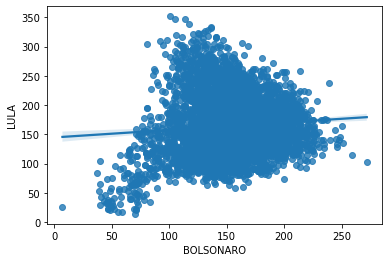

In [122]:
import seaborn as sns

sns.regplot(x=df_urnas_sp_2020["BOLSONARO"], y=df_urnas_sp_2020["LULA"])

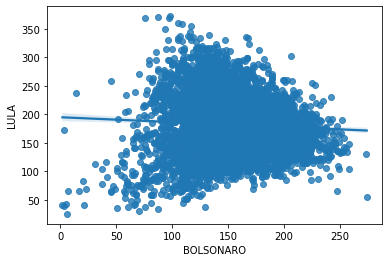

In [123]:
sns.regplot(x=df_urnas_sp_pre2020["BOLSONARO"], y=df_urnas_sp_pre2020["LULA"])

# Análise BA

In [131]:
df_ba_med = df_ba[df_ba.NM_MUNICIPIO.isin(df_munic_med['NM_MUNICIPIO'])]
df_ba_med

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA,MODELO_URNA
44693,31/10/2022,15:48:51,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,BA,35793,IPIAÚ,24,43,1104,1,Presidente,22,PL,Partido Liberal,30/10/2022 18:23:11,235,186,49,1,APURADA,1,Nominal,22,JAIR BOLSONARO,70,1016273,742.732.356.611.457.054.,974.991,D250019F,27/09/2022 18:31:00,1 - 43,#NULO#,30/10/2022 08:00:01,30/10/2022 17:02:29,31,30/10/2022 17:04:24,-1,-1,2009
44694,31/10/2022,15:48:51,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,BA,35793,IPIAÚ,24,43,1104,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 18:23:11,235,186,49,1,APURADA,1,Nominal,13,LULA,107,1016273,742.732.356.611.457.054.,974.991,D250019F,27/09/2022 18:31:00,1 - 43,#NULO#,30/10/2022 08:00:01,30/10/2022 17:02:29,31,30/10/2022 17:04:24,-1,-1,2009
44695,31/10/2022,15:48:51,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,BA,35793,IPIAÚ,24,43,1104,1,Presidente,-1,#NULO#,#NULO#,30/10/2022 18:23:11,235,186,49,1,APURADA,3,Nulo,96,Nulo,7,1016273,742.732.356.611.457.054.,974.991,D250019F,27/09/2022 18:31:00,1 - 43,#NULO#,30/10/2022 08:00:01,30/10/2022 17:02:29,31,30/10/2022 17:04:24,-1,-1,2009
44696,31/10/2022,15:48:51,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,BA,35793,IPIAÚ,24,43,1104,1,Presidente,-1,#NULO#,#NULO#,30/10/2022 18:23:11,235,186,49,1,APURADA,2,Branco,95,Branco,2,1016273,742.732.356.611.457.054.,974.991,D250019F,27/09/2022 18:31:00,1 - 43,#NULO#,30/10/2022 08:00:01,30/10/2022 17:02:29,31,30/10/2022 17:04:24,-1,-1,2009
44697,31/10/2022,15:48:51,2022,0,Eleição Ordinária,407,30/10/2022,2,547,Eleições Gerais Estaduais 2022,BA,35793,IPIAÚ,24,43,1104,3,Governador,44,UNIÃO,UNIÃO BRASIL,30/10/2022 18:23:11,235,186,49,1,APURADA,1,Nominal,44,ACM NETO,93,1016273,742.732.356.611.457.054.,974.991,D250019F,27/09/2022 18:31:00,3 - 43,#NULO#,30/10/2022 08:00:01,30/10/2022 17:02:29,31,30/10/2022 17:04:24,-1,-1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252558,31/10/2022,15:48:51,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,BA,30872,DIAS D'ÁVILA,186,158,1236,1,Presidente,-1,#NULO#,#NULO#,30/10/2022 18:20:47,243,190,53,1,APURADA,3,Nulo,96,Nulo,9,2155333,887.219.209.483.232.090.,903.650,4B2CE1FC,26/09/2022 18:01:00,1 - 158,#NULO#,30/10/2022 08:00:01,30/10/2022 17:01:04,2,30/10/2022 17:04:26,-1,-1,2020
252559,31/10/2022,15:48:51,2022,0,Eleição Ordinária,407,30/10/2022,2,547,Eleições Gerais Estaduais 2022,BA,30872,DIAS D'ÁVILA,186,158,1236,3,Governador,-1,#NULO#,#NULO#,30/10/2022 18:20:47,243,190,53,1,APURADA,2,Branco,95,Branco,2,2155333,887.219.209.483.232.090.,903.650,4B2CE1FC,26/09/2022 18:01:00,3 - 158,#NULO#,30/10/2022 08:00:01,30/10/2022 17:01:04,2,30/10/2022 17:04:26,-1,-1,2020
252560,31/10/2022,15:48:51,2022,0,Eleição Ordinária,407,30/10/2022,2,547,Eleições Gerais Estaduais 2022,BA,30872,DIAS D'ÁVILA,186,158,1236,3,Governador,-1,#NULO#,#NULO#,30/10/2022 18:20:47,243,190,53,1,APURADA,3,Nulo,96,Nulo,5,2155333,887.219.209.483.232.090.,903.650,4B2CE1FC,26/09/2022 18:01:00,3 - 158,#NULO#,30/10/2022 08:00:01,30/10/2022 17:01:04,2,30/10/2022 17:04:26,-1,-1,2020
252561,31/10/2022,15:48:51,2022,0,Eleição Ordinária,407,30/10/2022,

In [132]:
df_ba_med['MODELO_URNA'].value_counts()

2010    19601
2020    13189
2015     8544
2009     6763
2011     5200
2013     2045
Name: MODELO_URNA, dtype: int64

Modelos de urna **não-2020** em cidades médias de SP:

In [133]:
df_ba_med.query('MODELO_URNA != 2020')['MODELO_URNA'].value_counts().sum()

42153

Urnas únicas:

In [134]:
df_urnas_ba = df_ba_med[['NR_ZONA', 'NR_SECAO', 'MODELO_URNA']].drop_duplicates()
df_urnas_ba

,NR_ZONA,NR_SECAO,MODELO_URNA
44693,24,43,2009
44701,24,44,2009
44709,24,45,2009
44717,24,46,2009
44724,24,47,2009
...,...,...,...
252523,186,154,2020
252531,186,155,2020
252539,186,156,2020
252547,186,157,2020


In [135]:
def get_votos_candidato(zona, secao, cd_candidato):
  return df_ba_med[(df_ba_med.NR_ZONA == zona) & (df_ba_med.NR_SECAO == secao) & (df_ba_med.NR_VOTAVEL == cd_candidato)]['QT_VOTOS'].sum()

In [136]:
df_urnas_ba['BOLSONARO'] = df_urnas_ba.apply(lambda row: get_votos_candidato(row['NR_ZONA'], row['NR_SECAO'], 22), axis=1)

In [137]:
df_urnas_ba['LULA'] = df_urnas_ba.apply(lambda row: get_votos_candidato(row['NR_ZONA'], row['NR_SECAO'], 13), axis=1)

In [138]:
df_urnas_ba[df_urnas_ba.MODELO_URNA == 2020]

,NR_ZONA,NR_SECAO,MODELO_URNA,BOLSONARO,LULA
72623,42,74,2020,88,336
72631,42,75,2020,79,344
72639,42,76,2020,80,347
72647,42,77,2020,73,351
72655,42,78,2020,69,392
...,...,...,...,...,...
252523,186,154,2020,39,413
252531,186,155,2020,79,315
252539,186,156,2020,58,343
252547,186,157,2020,22,147


In [139]:
df_urnas_ba_2020 = df_urnas_ba[df_urnas_ba.MODELO_URNA == 2020]
df_urnas_ba_2020

,NR_ZONA,NR_SECAO,MODELO_URNA,BOLSONARO,LULA
72623,42,74,2020,88,336
72631,42,75,2020,79,344
72639,42,76,2020,80,347
72647,42,77,2020,73,351
72655,42,78,2020,69,392
...,...,...,...,...,...
252523,186,154,2020,39,413
252531,186,155,2020,79,315
252539,186,156,2020,58,343
252547,186,157,2020,22,147


In [140]:
df_urnas_ba_pre2020 = df_urnas_ba[df_urnas_ba.MODELO_URNA != 2020]
df_urnas_ba_pre2020

,NR_ZONA,NR_SECAO,MODELO_URNA,BOLSONARO,LULA
44693,24,43,2009,70,192
44701,24,44,2009,85,189
44709,24,45,2009,66,189
44717,24,46,2009,85,211
44724,24,47,2009,71,268
...,...,...,...,...,...
251280,185,136,2010,22,133
251288,185,137,2010,44,301
251296,185,138,2010,50,319
251304,185,139,2010,58,325


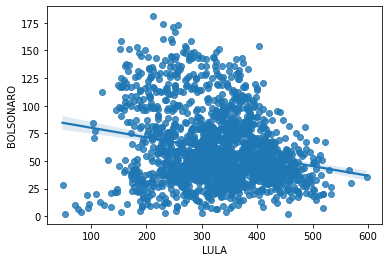

In [143]:
import seaborn as sns

sns.regplot(x=df_urnas_ba_2020["LULA"], y=df_urnas_ba_2020["BOLSONARO"])

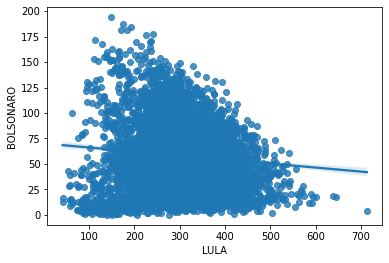

In [144]:
sns.regplot(x=df_urnas_ba_pre2020["LULA"], y=df_urnas_ba_pre2020["BOLSONARO"])